<a href="https://colab.research.google.com/github/woraphonp-038-5/Project-Big-Data/blob/main/ThaiBaan_Data_Analytics_and_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mini Project 2: Data Analytics and Modeling

<img src="https://datarundown.com/wp-content/uploads/2023/05/Model-Data-Analytics.jpg" width="400px">

ชื่อกลุ่ม: ...

รายชื่อสมาชิก การแบ่งงาน และสัดส่วนในการทำงาน:
1. ...
2. ...
3. ...
4. ...

กำหนดส่ง: ศุกร์ 24 ตุลาคม 2568  

รายงานในชั้นเรียน: เสาร์ 25 ตุลาคม 2568

** NOTE **
* อย่าลืมบันทึกงานที่ทำในโน้ตบุ๊คนี้เป็นประจำขณะทำงาน มิเช่นนั้นงานที่ทำอยู่อาจสูญหายได้
* **เริ่มทำแต่เนิ่น ๆ อย่ารอที่จะทำก่อนส่ง เพราะจะทำไม่เสร็จ เนื่องจากปัญหามากมายที่จะเกิดขึ้นระหว่างการทำงาน และอาจารย์ไม่รับปรึกษาในคืนก่อนส่ง**
----------------------

### เลือกชุดข้อมูล 1 ชุดจากข้อมูลที่กำหนดให้ต่อไปนี้
* <b>MovieLens 1M Data Set<b>
    * ข้อมูลชุดนี้มีข้อมูลเกี่ยวกับ movies, users, และ how they rate the movies
    * สามารถดูรายละเอียดได้ที่ http://grouplens.org/datasets/movielens/
    * Download the 1 million ratings data set from https://grouplens.org/datasets/movielens/1m/
    * Merge all of the data into a single Pandas DataFrame. See
        * https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html
    
* <b>Walmart_Sales_Forecast<b>
    * สามารถดูรายละเอียดได้ที่ https://github.com/Asikpalysik/Walmart_Sales_Forecast/tree/main
    * ข้อมูลประกอบด้วยไฟล์ features.csv, stores.csv และ ข้อมูลยอดขาย (train.csv และ test.csv)
    * ให้ใช้ข้อมูลจากทุกไฟล์ทุกอย่างประกอบกันในการวิเคราะห์
    
* <b>NYC Taxi Trips<b>
    * ข้อมูลทริปของแท็กซี่ในเมืองนิวยอร์กจาก https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page
    * ข้อมูลเก็บโดย The NYC Taxi and Limousine Commission (TLC) ประกอบด้วย pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts
    * นอกจากไฟล์ข้อมูลทริปของแท็กซี่แล้ว ยังมีข้อมูลเกี่ยวกับ zone ของพื้นที่ที่ให้บริการ และคำอธิบายข้อมูลในส่วนล่างสุดของหน้าเดียวกัน
    * ให้ศึกษาข้อมูลการเดินทางของแท็กซี่เหลืองหรือแท็กซี่เขียวในช่วงหนึ่ง (เช่น 1 เดือน หรือ 1 ปีที่ผ่านมา เป็นต้น)
    * ตัวอย่างการอ่านไฟล์ parquet
    ```python
    # install this module to read .parquet files
    !pip install pyarrow
    import pyarrow.parquet as pq
    trips = pq.read_table('yellow_tripdata_2023-09.parquet')
    trips = trips.to_pandas()
    trips
    ```
    
----------------------------------

### ศึกษาข้อมูลที่เลือกใช้ แล้วทำการ
* Tell story about data อธิบายลักษณะของข้อมูล ทำความเข้าใจเกี่ยวกับข้อมูลชุดนี้ ด้วยสถิติ และนำเสนอด้วยแผนภาพ แผนภูมิ หรือกราฟต่าง ๆ
* ตั้ง<span style="color:red">*ปัญหาหรือคำถามเชิงองค์กรหรือธุรกิจ*</span>ที่กลุ่มท่านสนใจเกี่ยวกับข้อมูลนี้ แล้วทำการคาดการณ์ (conjectures) เกี่ยวกับ<span style="color:red">*ปัญหาหรือคำถาม*</span>ที่ได้ตั้งไว้อย่างน้อย 3 ข้อ แล้วสนับสนุนหรือปฏิเสธข้อคาดการณ์ด้วยการวิเคราะห์ข้อมูลหรือด้วย data visualization
    * ปัญหาที่สนใจมีความสำคัญอย่างไร?
    * ข้อคาดการณ์ของท่านจะนำไปสู่การแก้ไขปัญหาหรือตอบคำถามอย่างไร?
* สร้างตัวแบบทำนายโดยใช้ข้อมูลที่เลือกในการตอบปัญหาหรือคำถาม
    * prepare data
    * feature engineering
    * partition data (consider class if any)
    * handle imbalance data
    * build model
      * hyperparameter tuning
    * test model

---

## 🎬 **รายละเอียดไฟล์ข้อมูล (MovieLens 1M Data Set)**

---

### 1️⃣ **ไฟล์ ratings.dat**

**โครงสร้างข้อมูล:**

```
UserID::MovieID::Rating::Timestamp
```

**รายละเอียด:**

* UserID: หมายเลขผู้ใช้ (1 ถึง 6040)
* MovieID: หมายเลขภาพยนตร์ (1 ถึง 3952)
* Rating: คะแนนจาก 1 ถึง 5 ดาว (เต็มดาวเท่านั้น)
* Timestamp: เวลาการให้คะแนน (หน่วยเป็นวินาที ตั้งแต่ epoch time)
* ผู้ใช้ทุกคนให้คะแนนอย่างน้อย **20 เรื่อง**

---

### 2️⃣ **ไฟล์ users.dat**

**โครงสร้างข้อมูล:**

```
UserID::Gender::Age::Occupation::Zip-code
```

**รายละเอียด:**

* Gender:

  * “M” = ผู้ชาย
  * “F” = ผู้หญิง
* Age (ช่วงอายุ):

  ```
  1: ต่ำกว่า 18 ปี
  18: 18–24 ปี
  25: 25–34 ปี
  35: 35–44 ปี
  45: 45–49 ปี
  50: 50–55 ปี
  56: 56 ปีขึ้นไป
  ```
* Occupation (อาชีพ):

  ```
  0: อื่น ๆ / ไม่ระบุ
  1: ครู / นักวิชาการ
  2: ศิลปิน
  3: ธุรการ / งานสำนักงาน
  4: นักศึกษามหาวิทยาลัย / บัณฑิตศึกษา
  5: บริการลูกค้า
  6: แพทย์ / สาธารณสุข
  7: ผู้บริหาร / ผู้จัดการ
  8: เกษตรกร
  9: แม่บ้าน
  10: นักเรียนมัธยม
  11: ทนายความ
  12: โปรแกรมเมอร์
  13: ผู้เกษียณอายุ
  14: ฝ่ายขาย / การตลาด
  15: นักวิทยาศาสตร์
  16: อาชีพอิสระ
  17: ช่างเทคนิค / วิศวกร
  18: ช่างฝีมือ / ช่างไม้
  19: ว่างงาน
  20: นักเขียน
  ```
* ข้อมูลประชากรทั้งหมดมาจากการกรอกโดยสมัครใจของผู้ใช้
  และ **ไม่ได้ตรวจสอบความถูกต้อง**

---

### 3️⃣ **ไฟล์ movies.dat**

**โครงสร้างข้อมูล:**

```
MovieID::Title::Genres
```

**รายละเอียด:**

* Title: ชื่อภาพยนตร์ (รวมปีที่ออกฉายตาม IMDb)
* Genres: ประเภทของภาพยนตร์ (คั่นด้วย “|”)
  เช่น `Action|Comedy|Romance`
* หมวดหมู่ภาพยนตร์ที่ใช้มีดังนี้:

  ```
  Action, Adventure, Animation, Children's, Comedy, Crime,
  Documentary, Drama, Fantasy, Film-Noir, Horror, Musical,
  Mystery, Romance, Sci-Fi, Thriller, War, Western
  ```
* หมายเลขภาพยนตร์บางรายการอาจเป็นข้อมูลซ้ำหรือข้อมูลทดสอบ
* รายการภาพยนตร์ส่วนใหญ่ถูกป้อนด้วยมือ อาจมีข้อผิดพลาดเล็กน้อย

#### ปัญหา/คำถามที่สนใจคืออะไร
...

#### ปัญหา/คำถามที่สนใจมีความสำคัญอย่างไร?
...

#### ข้อคาดการณ์ของท่านจะนำไปสู่การแก้ไขปัญหาหรือตอบคำถาม
1. ...
2. ...
3. ...
4. (Optional)
5. (Optional)

## Data Loading

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

# Load data
movies = '/content/drive/MyDrive/ProjectJY/ml-1m/movies.dat'
ratings = '/content/drive/MyDrive/ProjectJY/ml-1m/ratings.dat'
users = '/content/drive/MyDrive/ProjectJY/ml-1m/users.dat'

# Load data into pandas DataFrames
movies_df = pd.read_csv(movies, sep='::', engine='python', encoding='latin-1', names=['MovieID', 'Title', 'Genres'])
ratings_df = pd.read_csv(ratings, sep='::', engine='python', names=['UserID', 'MovieID', 'Rating', 'Timestamp'])
users_df = pd.read_csv(users, sep='::', engine='python', names=['UserID', 'Gender', 'Age', 'Occupation', 'Zip-code'])

# Merge data
# Merge ratings and users DataFrames
merged_df = pd.merge(ratings_df, users_df, on='UserID')

# Merge the result with the movies DataFrame
merged_df = pd.merge(merged_df, movies_df, on='MovieID')

# Display the first few rows of the merged DataFrame
display(merged_df)

,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,Title,Genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,1,661,3,978302109,F,1,10,48067,James and the Giant Peach (1996),Animation|Children's|Musical
2,1,914,3,978301968,F,1,10,48067,My Fair Lady (1964),Musical|Romance
3,1,3408,4,978300275,F,1,10,48067,Erin Brockovich (2000),Drama
4,1,2355,5,978824291,F,1,10,48067,"Bug's Life, A (1998)",Animation|Children's|Comedy
...,...,...,...,...,...,...,...,...,...,...
1000204,6040,1091,1,956716541,M,25,6,11106,Weekend at Bernie's (1989),Comedy
1000205,6040,1094,5,956704887,M,25,6,11106,"Crying Game, The (1992)",Drama|Romance|War
1000206,6040,562,5,956704746,M,25,6,11106,Welcome to the Dollhouse (1995),Comedy|Drama
1000207,6040,1096,4,956715648,M,25,6,11106,Sophie's Choice (1982),Drama


In [3]:
users_df

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455
...,...,...,...,...,...
6035,6036,F,25,15,32603
6036,6037,F,45,1,76006
6037,6038,F,56,1,14706
6038,6039,F,45,0,01060


In [4]:
movies_df

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama


In [5]:
ratings_df

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


## Data Preparation

In [6]:
# Explore variables and check data quality

# Handle missing values, outliers, and noises

# Perform feature engineering (optional)


In [7]:
merged_df['Gender'] = merged_df['Gender'].replace({'F': 'Female', 'M': 'Male'})

# Use .replace() to map occupation codes to labels
merged_df['Occupation'] = merged_df['Occupation'].replace({
    0: "other" ,
    1: "academic/educator",
    2: "artist",
    3: "clerical/admin",
    4: "college/grad student",
    5: "customer service",
    6: "doctor/health care",
    7: "executive/managerial",
    8: "farmer",
    9: "homemaker",
    10: "K-12 student",
    11: "lawyer",
    12: "programmer",
    13: "retired",
    14: "sales/marketing",
    15: "scientist",
    16: "self-employed",
    17: "technician/engineer",
    18: "tradesman/craftsman",
    19: "unemployed",
    20: "writer"
})


# Use .replace() to map age codes to labels
merged_df['Age'] = merged_df['Age'].replace ({
    1: "Under 18",
    18: "18-24",
    25: "25-34",
    35: "35-44",
    45: "45-49",
    50: "50-55",
    56: "56+"
})
merged_df



,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,Title,Genres
0,1,1193,5,978300760,Female,Under 18,K-12 student,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,1,661,3,978302109,Female,Under 18,K-12 student,48067,James and the Giant Peach (1996),Animation|Children's|Musical
2,1,914,3,978301968,Female,Under 18,K-12 student,48067,My Fair Lady (1964),Musical|Romance
3,1,3408,4,978300275,Female,Under 18,K-12 student,48067,Erin Brockovich (2000),Drama
4,1,2355,5,978824291,Female,Under 18,K-12 student,48067,"Bug's Life, A (1998)",Animation|Children's|Comedy
...,...,...,...,...,...,...,...,...,...,...
1000204,6040,1091,1,956716541,Male,25-34,doctor/health care,11106,Weekend at Bernie's (1989),Comedy
1000205,6040,1094,5,956704887,Male,25-34,doctor/health care,11106,"Crying Game, The (1992)",Drama|Romance|War
1000206,6040,562,5,956704746,Male,25-34,doctor/health care,11106,Welcome to the Dollhouse (1995),Comedy|Drama
1000207,6040,1096,4,956715648,Male,25-34,doctor/health care,11106,Sophie's Choice (1982),Drama


In [8]:
merged_df['Genres'].unique()

array(['Drama', "Animation|Children's|Musical", 'Musical|Romance',
       "Animation|Children's|Comedy", 'Action|Adventure|Comedy|Romance',
       'Action|Adventure|Drama', 'Comedy|Drama',
       "Adventure|Children's|Drama|Musical", 'Musical', 'Comedy',
       "Animation|Children's", 'Comedy|Fantasy', 'Animation',
       'Comedy|Sci-Fi', 'Drama|War', 'Romance',
       "Animation|Children's|Musical|Romance",
       "Children's|Drama|Fantasy|Sci-Fi", 'Drama|Romance',
       'Animation|Comedy|Thriller',
       "Adventure|Animation|Children's|Comedy|Musical",
       "Animation|Children's|Comedy|Musical", 'Thriller',
       'Action|Crime|Romance', 'Action|Adventure|Fantasy|Sci-Fi',
       "Children's|Comedy|Musical", 'Action|Drama|War',
       "Children's|Drama", 'Crime|Drama|Thriller', 'Action|Crime|Drama',
       'Action|Adventure|Mystery', 'Crime|Drama',
       'Action|Adventure|Sci-Fi|Thriller',
       'Action|Adventure|Romance|Sci-Fi|War', 'Action|Thriller',
       'Action|Drama', 'Co

In [9]:
merged_df['Occupation'].unique()


array(['K-12 student', 'self-employed', 'scientist',
       'executive/managerial', 'writer', 'homemaker', 'academic/educator',
       'programmer', 'technician/engineer', 'other', 'clerical/admin',
       'sales/marketing', 'college/grad student', 'lawyer', 'farmer',
       'unemployed', 'artist', 'tradesman/craftsman', 'customer service',
       'retired', 'doctor/health care'], dtype=object)

In [10]:
merged_df['Occupation'].value_counts()


,count
Occupation,
college/grad student,131032
other,130499
executive/managerial,105425
academic/educator,85351
technician/engineer,72816
writer,60397
programmer,57214
artist,50068
sales/marketing,49109


In [11]:
merged_df.isnull().sum()

,0
UserID,0
MovieID,0
Rating,0
Timestamp,0
Gender,0
Age,0
Occupation,0
Zip-code,0
Title,0
Genres,0


## Explore Data

In [12]:
#การแปลง Timestamp เป็น เดือน (Month)
#ตัวแปร Timestamp มักจะอยู่ในรูปแบบ Unix Time (จำนวนวินาทีตั้งแต่ปี 1970) คุณต้องแปลงมันให้เป็นวันที่และดึงข้อมูลเดือนออกมา
merged_df['Datetime'] = pd.to_datetime(merged_df['Timestamp'], unit='s')
merged_df.head()

,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,Title,Genres,Datetime
0,1,1193,5,978300760,Female,Under 18,K-12 student,48067,One Flew Over the Cuckoo's Nest (1975),Drama,2000-12-31 22:12:40
1,1,661,3,978302109,Female,Under 18,K-12 student,48067,James and the Giant Peach (1996),Animation|Children's|Musical,2000-12-31 22:35:09
2,1,914,3,978301968,Female,Under 18,K-12 student,48067,My Fair Lady (1964),Musical|Romance,2000-12-31 22:32:48
3,1,3408,4,978300275,Female,Under 18,K-12 student,48067,Erin Brockovich (2000),Drama,2000-12-31 22:04:35
4,1,2355,5,978824291,Female,Under 18,K-12 student,48067,"Bug's Life, A (1998)",Animation|Children's|Comedy,2001-01-06 23:38:11


In [13]:
import pandas as pd

# Assume your data is already loaded into merged_df
# merged_df = pd.read_csv('your_data.csv') # Make sure this line is executed before this cell

# -----------------------------------------------------------
## ส่วนที่ 1: การเตรียมข้อมูล (แยก Genres)
# -----------------------------------------------------------

# เนื่องจากคอลัมน์ 'Genres' มักมีหลายค่าคั่นด้วย '|', เราต้องแยกแต่ละแนวให้อยู่ในแถวเดียว
# ทำให้ข้อมูลพร้อมสำหรับการวิเคราะห์ความถี่และเรตติ้งของแต่ละแนวหนัง
df_exploded = merged_df.assign(Genres=merged_df['Genres'].str.split('|')).explode('Genres')


# -----------------------------------------------------------
## ส่วนที่ 2: วิเคราะห์ความนิยมโดยรวม (ไม่แบ่งอายุ)
# -----------------------------------------------------------

print("--- 1. ความนิยมของประเภทภาพยนตร์โดยรวม ---")

# จัดกลุ่มด้วย 'Genres' และคำนวณ:
# 1. rating_mean: เรตติ้งเฉลี่ย
# 2. count: จำนวนการให้เรตติ้งทั้งหมด (ตัวชี้วัดความนิยม)
genre_summary_total = df_exploded.groupby('Genres').agg(
    rating_mean=('Rating', 'mean'),
    count=('Rating', 'count')
).reset_index()

# กรองเฉพาะแนวที่มีจำนวนการให้เรตติ้งสูง (เช่น มากกว่า 1000 ครั้ง)
# เพื่อหลีกเลี่ยงเรตติ้งเฉลี่ยสูงเกินจริงจากตัวอย่างน้อยๆ (ถ้าข้อมูลใหญ่)
# ถ้าข้อมูลน้อย ให้ข้ามขั้นตอนนี้หรือลดตัวเลข
# genre_summary_total = genre_summary_total[genre_summary_total['count'] >= 1000]

# จัดเรียงตามเรตติ้งเฉลี่ยจากมากไปน้อย
genre_summary_total_by_rating = genre_summary_total.sort_values(
    by='rating_mean', ascending=False
).head(10)

print("\n**1.1: 10 อันดับแรกตามเรตติ้งเฉลี่ย:**")
display(genre_summary_total_by_rating)

# จัดเรียงตามจำนวนการให้เรตติ้งจากมากไปน้อย
genre_summary_total_by_count = genre_summary_total.sort_values(
    by='count', ascending=False
).head(10)

print("\n**1.2: 10 อันดับแรกตามจำนวนการให้เรตติ้ง (ความถี่):**")
display(genre_summary_total_by_count)


# -----------------------------------------------------------
## ส่วนที่ 3: วิเคราะห์ความนิยมตามช่วงอายุ (Age-Based Analysis)
# -----------------------------------------------------------

print("\n--- 2. ความนิยมของประเภทภาพยนตร์ตามช่วงอายุ ---")

# จัดกลุ่มด้วย 'Age' และ 'Genres' และคำนวณเรตติ้งเฉลี่ย
genre_summary_by_age = df_exploded.groupby(['Age', 'Genres']).agg(
    rating_mean=('Rating', 'mean'),
    count=('Rating', 'count')
).reset_index()

# -------------------------------------------------
# ตัวอย่างการวิเคราะห์:
# 1. หาแนวหนังที่เรตติ้งเฉลี่ยสูงสุดในแต่ละช่วงอายุ
# -------------------------------------------------

top_genres_by_age_rating = genre_summary_by_age.loc[
    # กรองเอาเฉพาะแถวที่มีค่า 'rating_mean' สูงสุดในแต่ละ 'Age'
    genre_summary_by_age.groupby('Age')['rating_mean'].idxmax()
]

print("\n**2.1: แนวหนังที่ได้รับเรตติ้งเฉลี่ยสูงสุดในแต่ละกลุ่มอายุ:**")
display(top_genres_by_age_rating.sort_values(by='Age'))

# -------------------------------------------------
# 2. หาแนวหนังที่มีจำนวนการให้เรตติ้งสูงสุดในแต่ละช่วงอายุ
# -------------------------------------------------

top_genres_by_age_count = genre_summary_by_age.loc[
    # กรองเอาเฉพาะแถวที่มีค่า 'count' สูงสุดในแต่ละ 'Age'
    genre_summary_by_age.groupby('Age')['count'].idxmax()
]

print("\n**2.2: แนวหนังที่มีจำนวนการให้เรตติ้งสูงสุด (เป็นที่นิยมที่สุด) ในแต่ละกลุ่มอายุ:**")
display(top_genres_by_age_count.sort_values(by='Age'))

--- 1. ความนิยมของประเภทภาพยนตร์โดยรวม ---

**1.1: 10 อันดับแรกตามเรตติ้งเฉลี่ย:**


,Genres,rating_mean,count
9,Film-Noir,4.075188,18261
6,Documentary,3.933123,7910
16,War,3.893327,68527
7,Drama,3.766332,354529
5,Crime,3.708679,79541
2,Animation,3.684868,43293
12,Mystery,3.668102,40178
11,Musical,3.665519,41533
17,Western,3.637770,20683
13,Romance,3.607465,147523



**1.2: 10 อันดับแรกตามจำนวนการให้เรตติ้ง (ความถี่):**


,Genres,rating_mean,count
4,Comedy,3.522099,356580
7,Drama,3.766332,354529
0,Action,3.491185,257457
15,Thriller,3.570466,189680
14,Sci-Fi,3.466521,157294
13,Romance,3.607465,147523
1,Adventure,3.477257,133953
5,Crime,3.708679,79541
10,Horror,3.215013,76386
3,Children's,3.422035,72186



--- 2. ความนิยมของประเภทภาพยนตร์ตามช่วงอายุ ---

**2.1: แนวหนังที่ได้รับเรตติ้งเฉลี่ยสูงสุดในแต่ละกลุ่มอายุ:**


,Age,Genres,rating_mean,count
9,18-24,Film-Noir,3.997368,2280
27,25-34,Film-Noir,4.058725,6539
45,35-44,Film-Noir,4.064910,4175
63,45-49,Film-Noir,4.105376,1860
81,50-55,Film-Noir,4.175401,1870
99,56+,Film-Noir,4.125932,1207
117,Under 18,Film-Noir,4.145455,330



**2.2: แนวหนังที่มีจำนวนการให้เรตติ้งสูงสุด (เป็นที่นิยมที่สุด) ในแต่ละกลุ่มอายุ:**


,Age,Genres,rating_mean,count
4,18-24,Comedy,3.460417,69980
22,25-34,Comedy,3.490385,143210
43,35-44,Drama,3.782512,71590
61,45-49,Drama,3.784356,32141
79,50-55,Drama,3.878415,29247
97,56+,Drama,3.933465,17269
112,Under 18,Comedy,3.497491,11162


## 1.ภาพยนต์ประเภทใดที่ได้รับความนิยมสูงที่สุด

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
# ตั้งค่าให้แสดงผลในรูปแบบที่สวยงามของ Seaborn
sns.set_theme(style="whitegrid")

!wget -q https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf

# ตั้งค่าให้รองรับภาษาไทยใน Matplotlib
plt.rcParams['font.family'] = 'Tahoma' # ใช้ Tahoma หรือ 'Sarabun' ถ้าติดตั้งไว้
plt.rcParams['axes.unicode_minus'] = False # แก้ปัญหาเครื่องหมายลบเพี้ยน
mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf')
mpl.rc('font', family='TH Sarabun New')

In [17]:
df_exploded = merged_df.assign(Genres=merged_df['Genres'].str.split('|')).explode('Genres')
genre_summary_total = df_exploded.groupby('Genres').agg(
    rating_mean=('Rating', 'mean'),
    count=('Rating', 'count')
).reset_index()

# จัดเรียงตามจำนวนการให้เรตติ้งจากมากไปน้อย
genre_summary_total_by_count = genre_summary_total.sort_values(
    by='count', ascending=False
).head(10)

print("\n** 10 อันดับแรกตามจำนวนการให้เรตติ้ง **")
display(genre_summary_total_by_count)



** 10 อันดับแรกตามจำนวนการให้เรตติ้ง **


,Genres,rating_mean,count
4,Comedy,3.522099,356580
7,Drama,3.766332,354529
0,Action,3.491185,257457
15,Thriller,3.570466,189680
14,Sci-Fi,3.466521,157294
13,Romance,3.607465,147523
1,Adventure,3.477257,133953
5,Crime,3.708679,79541
10,Horror,3.215013,76386
3,Children's,3.422035,72186


/tmp/ipython-input-1214220894.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='Genres', data=top_genres_count, palette='viridis')


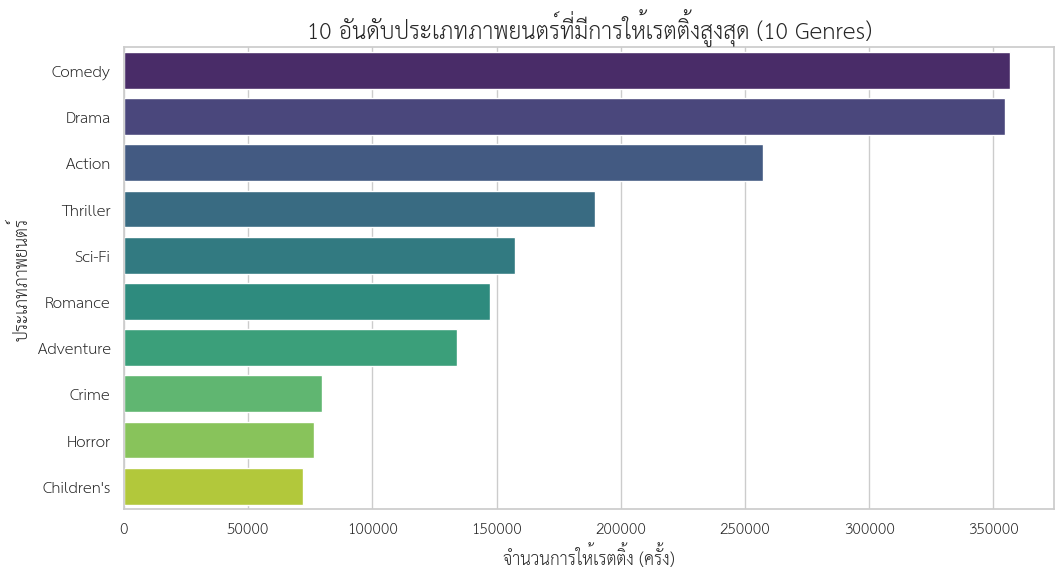

In [18]:
# ใช้ผลลัพธ์จาก "ส่วนที่ 2: วิเคราะห์ความนิยมโดยรวม" (genre_summary_total)
# กรองเอาแค่แนวหนังหลักๆ ที่มีการให้เรตติ้งสูง
top_n = 10
top_genres_count = genre_summary_total.sort_values(by='count', ascending=False).head(top_n)

plt.figure(figsize=(12, 6))
sns.barplot(x='count', y='Genres', data=top_genres_count, palette='viridis')
plt.title(f'10 อันดับประเภทภาพยนตร์ที่มีการให้เรตติ้งสูงสุด ({top_n} Genres)', fontsize=16)
plt.xlabel('จำนวนการให้เรตติ้ง (ครั้ง)', fontsize=12)
plt.ylabel('ประเภทภาพยนตร์', fontsize=12)
plt.show()

### ตอบ

 จากกราฟประเภทภาพยนต์ที่ได้รับความนิยมที่สุดอันดับ 1 คือ Comedy อันดับ 2 คือ Drama และอันดับ 3 คือ Action และตามประเภทต่าง ๆ ตามกราฟ

## 2.คนในแต่ละช่วงวัยชอบดูหนังแนวใด

In [19]:
top_genres_by_age_count = genre_summary_by_age.loc[
    # กรองเอาเฉพาะแถวที่มีค่า 'count' สูงสุดในแต่ละ 'Age'
    genre_summary_by_age.groupby('Age')['count'].idxmax()
]

print("\n**2.2: แนวหนังที่มีจำนวนการให้เรตติ้งสูงสุด (เป็นที่นิยมที่สุด) ในแต่ละกลุ่มอายุ:**")
display(top_genres_by_age_count.sort_values(by='Age'))


**2.2: แนวหนังที่มีจำนวนการให้เรตติ้งสูงสุด (เป็นที่นิยมที่สุด) ในแต่ละกลุ่มอายุ:**


,Age,Genres,rating_mean,count
4,18-24,Comedy,3.460417,69980
22,25-34,Comedy,3.490385,143210
43,35-44,Drama,3.782512,71590
61,45-49,Drama,3.784356,32141
79,50-55,Drama,3.878415,29247
97,56+,Drama,3.933465,17269
112,Under 18,Comedy,3.497491,11162



**2.2: แนวหนังที่มีจำนวนการให้เรตติ้งสูงสุด (เป็นที่นิยมที่สุด) ในแต่ละกลุ่มอายุ:**


,Age,Genres,rating_mean,count
4,18-24,Comedy,3.460417,69980
22,25-34,Comedy,3.490385,143210
43,35-44,Drama,3.782512,71590
61,45-49,Drama,3.784356,32141
79,50-55,Drama,3.878415,29247
97,56+,Drama,3.933465,17269
112,Under 18,Comedy,3.497491,11162


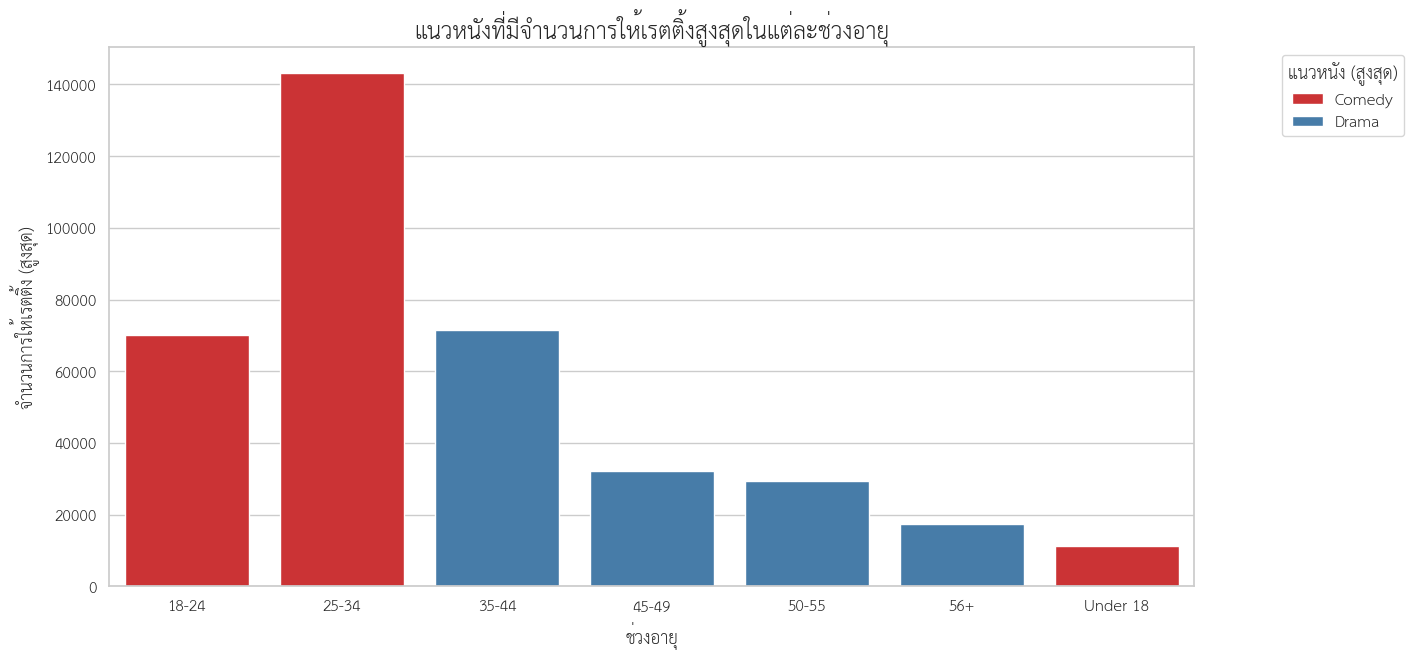

In [20]:
top_genres_by_age_count = genre_summary_by_age.loc[
    # กรองเอาเฉพาะแถวที่มีค่า 'count' สูงสุดในแต่ละ 'Age'
    genre_summary_by_age.groupby('Age')['count'].idxmax()
]

print("\n**2.2: แนวหนังที่มีจำนวนการให้เรตติ้งสูงสุด (เป็นที่นิยมที่สุด) ในแต่ละกลุ่มอายุ:**")
display(top_genres_by_age_count.sort_values(by='Age'))

plt.figure(figsize=(14, 7))
sns.barplot(
    data=top_genres_by_age_count,
    x='Age',
    y='count', # เปลี่ยนแกน Y เป็น count
    hue='Genres', # ใช้ Genres เป็นตัวแบ่งสี
    dodge=False, # แสดงเป็นแท่งเดียว
    palette='Set1'
)

plt.title('แนวหนังที่มีจำนวนการให้เรตติ้งสูงสุดในแต่ละช่วงอายุ', fontsize=16) # เปลี่ยนชื่อกราฟ
plt.xlabel('ช่วงอายุ', fontsize=12)
plt.ylabel('จำนวนการให้เรตติ้ง (สูงสุด)', fontsize=12) # เปลี่ยนชื่อแกน Y
plt.legend(title='แนวหนัง (สูงสุด)', loc='upper right', bbox_to_anchor=(1.2, 1))
# plt.ylim(3.5, 5.1) # ไม่ต้องตั้งค่าแกน Y แบบนี้แล้ว
plt.show()

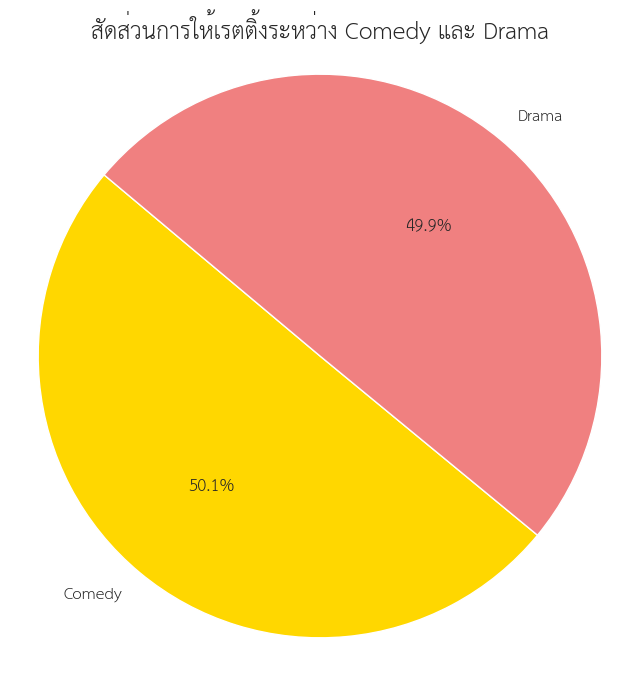

In [21]:
# Filter the DataFrame for 'Comedy' and 'Drama' genres
comedy_drama_df = df_exploded[df_exploded['Genres'].isin(['Comedy', 'Drama'])]

# Count the occurrences of each genre
genre_counts = comedy_drama_df['Genres'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%', startangle=140, colors=['gold', 'lightcoral'])
plt.title('สัดส่วนการให้เรตติ้งระหว่าง Comedy และ Drama', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

### ตอบ

จากข้อมูลเราจะทราบได้ว่าผู็คนที่มีอในช่วงอายุ น้อยกว่าหรือเท่ากับ 18-34 ปี ส่วนใหญ่ดูหนังแนว Comedy  โดยมี ช่วงอายุ 25-34 ปีมากที่สุด และ ใชช่วงอายุ 35-56+ ปี จะดูแนว Drama โดยมี ช่วงอายุ 35-44  ปีมากที่สุด และเราได้เปรียบเทียบ ว่าทั้งสองแนวสามารถดูได้จาก pie chart จะเห็นว่าจำนวนไม่ได้แตกต่างกันมาก โดย Comedy คิดเป็น 49.9% Drama คิดเป็น 50.1 %

## 3.เพศชายและเพศหญิงมีพฤติกรรมการดูหนังแตกต่างกันหรือไม่

In [24]:
# Analyze the top 10 most watched movies by gender

# Group by Gender and MovieID, then count the number of ratings
gender_movie_counts = merged_df.groupby(['Gender', 'MovieID']).size().reset_index(name='count')

# Get the top 10 movies for each gender
top_movies_by_gender = gender_movie_counts.groupby('Gender').apply(lambda x: x.nlargest(10, 'count')).reset_index(drop=True)

# Merge with movies_df to get movie titles
top_movies_with_titles = pd.merge(top_movies_by_gender, movies_df[['MovieID', 'Title']], on='MovieID')

print("--- 10 อันดับภาพยนตร์ที่มีการให้เรตติ้งสูงสุดสำหรับแต่ละเพศ ---")

# Separate and display for each gender
top_movies_female = top_movies_with_titles[top_movies_with_titles['Gender'] == 'Female']
top_movies_male = top_movies_with_titles[top_movies_with_titles['Gender'] == 'Male']

print("\n** 10 อันดับภาพยนตร์ที่มีการให้เรตติ้งสูงสุดสำหรับเพศหญิง **")
display(top_movies_female)

print("\n** 10 อันดับภาพยนตร์ที่มีการให้เรตติ้งสูงสุดสำหรับเพศชาย **")
display(top_movies_male)

--- 10 อันดับภาพยนตร์ที่มีการให้เรตติ้งสูงสุดสำหรับแต่ละเพศ ---

** 10 อันดับภาพยนตร์ที่มีการให้เรตติ้งสูงสุดสำหรับเพศหญิง **


/tmp/ipython-input-2632234819.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_movies_by_gender = gender_movie_counts.groupby('Gender').apply(lambda x: x.nlargest(10, 'count')).reset_index(drop=True)


,Gender,MovieID,count,Title
0,Female,2858,946,American Beauty (1999)
1,Female,2396,798,Shakespeare in Love (1998)
2,Female,593,706,"Silence of the Lambs, The (1991)"
3,Female,2762,664,"Sixth Sense, The (1999)"
4,Female,1265,658,Groundhog Day (1993)
5,Female,608,657,Fargo (1996)
6,Female,1210,653,Star Wars: Episode VI - Return of the Jedi (1983)
7,Female,1196,648,Star Wars: Episode V - The Empire Strikes Back...
8,Female,260,647,Star Wars: Episode IV - A New Hope (1977)
9,Female,356,644,Forrest Gump (1994)



** 10 อันดับภาพยนตร์ที่มีการให้เรตติ้งสูงสุดสำหรับเพศชาย **


,Gender,MovieID,count,Title
10,Male,2858,2482,American Beauty (1999)
11,Male,260,2344,Star Wars: Episode IV - A New Hope (1977)
12,Male,1196,2342,Star Wars: Episode V - The Empire Strikes Back...
13,Male,1210,2230,Star Wars: Episode VI - Return of the Jedi (1983)
14,Male,589,2193,Terminator 2: Judgment Day (1991)
15,Male,480,2099,Jurassic Park (1993)
16,Male,2028,2078,Saving Private Ryan (1998)
17,Male,2571,2076,"Matrix, The (1999)"
18,Male,1580,2000,Men in Black (1997)
19,Male,1270,1944,Back to the Future (1985)


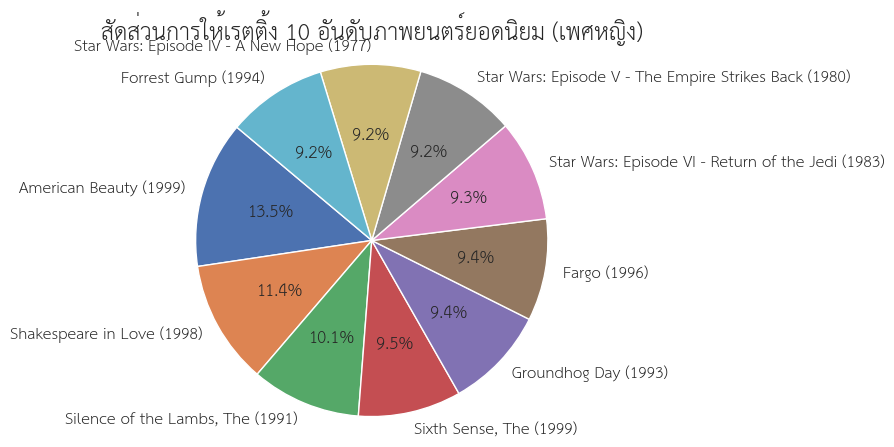

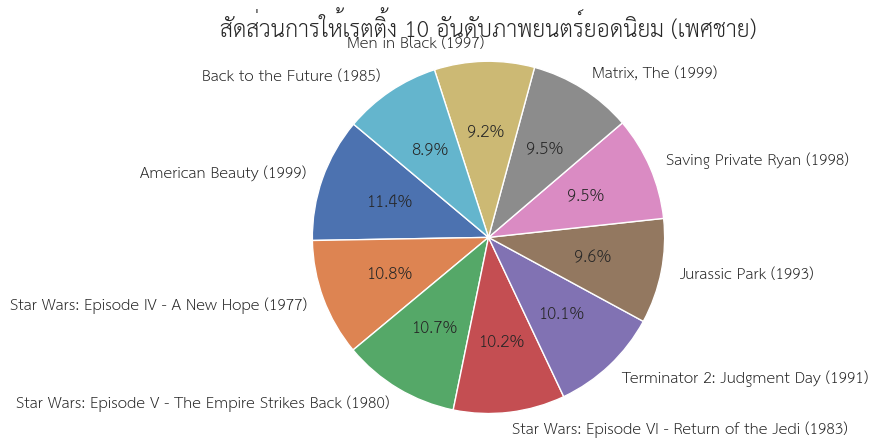

In [28]:
# Create pie charts for top 10 movies by gender

# Pie chart for Female top 10 movies
plt.figure(figsize=(5, 5))
plt.pie(top_movies_female['count'], labels=top_movies_female['Title'], autopct='%1.1f%%', startangle=140)
plt.title('สัดส่วนการให้เรตติ้ง 10 อันดับภาพยนตร์ยอดนิยม (เพศหญิง)', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Pie chart for Male top 10 movies
plt.figure(figsize=(5, 5))
plt.pie(top_movies_male['count'], labels=top_movies_male['Title'], autopct='%1.1f%%', startangle=140)
plt.title('สัดส่วนการให้เรตติ้ง 10 อันดับภาพยนตร์ยอดนิยม (เพศชาย)', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [25]:
# Find common movies in the top 10 for both genders
common_movies = pd.merge(top_movies_female, top_movies_male, on='MovieID', suffixes=('_female', '_male'))

print("\n--- ภาพยนตร์ที่ติดอันดับ 10 อันดับแรกของทั้งเพศชายและเพศหญิง ---")
display(common_movies[['Title_female', 'count_female', 'count_male']])


--- ภาพยนตร์ที่ติดอันดับ 10 อันดับแรกของทั้งเพศชายและเพศหญิง ---


,Title_female,count_female,count_male
0,American Beauty (1999),946,2482
1,Star Wars: Episode VI - Return of the Jedi (1983),653,2230
2,Star Wars: Episode V - The Empire Strikes Back...,648,2342
3,Star Wars: Episode IV - A New Hope (1977),647,2344


### ตอบ

พฤติกรรมการดูหนังของทั้งเพศชายและเพศหญิงนั้นมีความคล้ายคลึงกันอย่างมากในแง่ของการเลือกชม การมีภาพยนตร์ซ้ำกันถึง 4 เรื่องใน Top 10 ชี้ให้เห็นว่า พฤติกรรมการดูหนังของทั้งสองเพศไม่ได้แตกต่างกันอย่างสิ้นเชิง แต่มี จุดร่วมของความนิยมในภาพยนตร์คุณภาพระดับสูงและมีชื่อเสียง เป็นตัวขับเคลื่อนที่สำคัญ

In [14]:
# Descriptive statistics

# Data visualization
# Target variable analysis: examine how each feature correlates with or impacts the target/interested variable


## Data Modeling

In [15]:
# Partition data

# Handle imbalance data (optional)

# Model selection and tuning

# Evaluate models


#### สรุปผลที่ได้
...

-----------------
# เสร็จแล้ววววว 🥳

สิ่งที่ต้องแนบส่ง:
* Notebook File (ตัวอย่าง "filename.ipynb") หรือ Link to Google Colab / GitHub ซึ่งมีผลลัพธ์จากการรันโค้ดแสดงทั้งหมด
* Slides สำหรับการนำเสนอ **10** นาที ซึ่งประกอบไปด้วย
    * Data Description: อธิบายข้อมูลที่ใช้
    * Data Preparation: การเตรียมข้อมูลก่อนวิเคราะห์
    * Motivation: ปัญหาหรือคำถามที่ตั้ง ทำไมถึงสนใจที่จะทำงานในเรื่องนี้
    * Communicating Results (with figure, table, etc.): ผลที่ได้จากการศึกษา โดยระบุแนวทางที่ใช้ที่ทำให้เกิดผลลัพธ์ดังกล่าวด้วย
        โดยไม่ต้องนำเสนอ source code ผลประกอบด้วย 2 ส่วนสำคัญ จาก
        * Conjectures >= 3 ข้อ
        * Machine learning models
    * Conclusion: สรุปผลที่ได้จากการวิเคราะห์ข้อมูล
** Note: แต่ละกลุ่มส่งแต่ละไฟล์ครั้งเดียว **
---------------------